In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from astropy.io import fits
from astropy.table import Table
import h5py

统计各星表的星数密度

In [50]:
cat_path_list = ['/home/haoyanzhen_shao/project/simulation_work/data_dir/reference_catalog/C6_MMW_GGC_Astrometry_Fornax_healpix_J2000.hdf5',
                 '/home/haoyanzhen_shao/project/simulation_work/data_dir/reference_catalog/C6_MMW_GGC_Astrometry_Sculptor_healpix_J2000.hdf5',
                 '/home/haoyanzhen_shao/project/simulation_work/data_dir/reference_catalog/CT1.0-Bulge-GDR3-G21.0-rev_J2000.fits',
                 '/home/haoyanzhen_shao/project/simulation_work/data_dir/reference_catalog/CT1.5-ant-GDR3-G28.0-rev_J2000.fits',
                 '/home/haoyanzhen_shao/project/simulation_work/data_dir/reference_catalog/CT1.5-GAC-GDR3-G28.0-rev_J2000.fits',
                 '/home/haoyanzhen_shao/project/simulation_work/data_dir/reference_catalog/CT1.5-N3532-GDR3-G26.0-rev_J2000.fits',
                 '/home/haoyanzhen_shao/project/simulation_work/data_dir/reference_catalog/CT1.5-N6397-GDR3-G26.0-rev_J2000.fits',
                 '/home/haoyanzhen_shao/project/simulation_work/data_dir/reference_catalog/CT1.8-NEP-GDR3-G28.0-rev_J2000.fits',
                 '/home/haoyanzhen_shao/project/simulation_work/data_dir/reference_catalog/CT1.8-NGP-GDR3-G28.0-rev_J2000.fits'
                 ]
starCount_list = []
for cati,cat_path in enumerate(cat_path_list):
    if cati <= 1:
        cat = h5py.File(cat_path)
        sc = 0
        ra_max, ra_min, dec_max, dec_min = 0,0,0,0
        for i in cat['catalog'].keys():
            if sc == 0:
                ra_max, ra_min, dec_max, dec_min = cat['catalog'][i]['RA'][:].max(),cat['catalog'][i]['RA'][:].min(),cat['catalog'][i]['Dec'][:].max(),cat['catalog'][i]['Dec'][:].min()
            else:
                ra_max = np.max((cat['catalog'][i]['RA'][:].max(),ra_max))
                ra_min = np.min((cat['catalog'][i]['RA'][:].min(),ra_min))
                dec_max = np.max((cat['catalog'][i]['Dec'][:].max(),dec_max))
                dec_min = np.min((cat['catalog'][i]['Dec'][:].min(),dec_min))
            sc += len(cat['catalog'][i]['RA'][:])
            # print(ra_max,ra_min,dec_max,dec_min,gc)
        sc = sc/((ra_max-ra_min)*(dec_max-dec_min)*np.pi)
        starCount_list.append(sc)
        
    if cati > 1:
        cat = Table.read(cat_path)
        starCount_list.append(len(cat)/((cat['RA'].max()-cat['RA'].min())*(cat['Dec'].max()-cat['Dec'].min())*np.pi))
        


In [5]:
cat_path_list = ['/home/haoyanzhen_shao/project/simulation_work/data_dir/reference_catalog/galaxyCats_r_3.0_healpix_shift_40.000000_-34.500000_Fornax.hdf5',
                 '/home/haoyanzhen_shao/project/simulation_work/data_dir/reference_catalog/galaxyCats_r_3.0_healpix_shift_15.030000_-33.750000_Sculptor.hdf5',
                 '/home/haoyanzhen_shao/project/simulation_work/data_dir/reference_catalog/galaxyCats_r_3.0_healpix_shift_270.000000_-29.000000_Bulge.hdf5',
                 '/home/haoyanzhen_shao/project/simulation_work/data_dir/reference_catalog/galaxyCats_r_3.0_healpix_shift_75.000000_37.000000_Ant.hdf5',
                 '/home/haoyanzhen_shao/project/simulation_work/data_dir/reference_catalog/galaxyCats_r_3.0_healpix_shift_90.000000_24.500000_GAC.hdf5',
                 '/home/haoyanzhen_shao/project/simulation_work/data_dir/reference_catalog/galaxyCats_r_3.0_healpix_shift_166.411000_-58.722100_N3532.hdf5',
                 '/home/haoyanzhen_shao/project/simulation_work/data_dir/reference_catalog/galaxyCats_r_3.0_healpix_shift_265.170830_-53.673610_N6397.hdf5',
                 '/home/haoyanzhen_shao/project/simulation_work/data_dir/reference_catalog/galaxyCats_r_3.0_healpix_shift_270.000000_66.560000_NEP.hdf5',
                 '/home/haoyanzhen_shao/project/simulation_work/data_dir/reference_catalog/galaxyCats_r_3.0_healpix_shift_192.859500_27.128300_NGP.hdf5'
                 ]
galCount_list = []
for cat_path in cat_path_list:
    cat = h5py.File(cat_path)
    gc = 0
    ra_max, ra_min, dec_max, dec_min = 0,0,0,0
    for i in cat['galaxies'].keys():
        if gc == 0:
            ra_max, ra_min, dec_max, dec_min = cat['galaxies'][i]['ra_true'][:].max(),cat['galaxies'][i]['ra_true'][:].min(),cat['galaxies'][i]['dec_true'][:].max(),cat['galaxies'][i]['dec_true'][:].min()
        else:
            ra_max = np.max((cat['galaxies'][i]['ra_true'][:].max(),ra_max))
            ra_min = np.min((cat['galaxies'][i]['ra_true'][:].min(),ra_min))
            dec_max = np.max((cat['galaxies'][i]['dec_true'][:].max(),dec_max))
            dec_min = np.min((cat['galaxies'][i]['dec_true'][:].min(),dec_min))
        gc += len(cat['galaxies'][i]['ra_true'][:])
        # print(ra_max,ra_min,dec_max,dec_min,gc)
    gc = gc/((ra_max-ra_min)*(dec_max-dec_min)*np.pi)
    galCount_list.append(gc)


In [6]:
galCount_list

[101584.6520016737,
 101584.6520016737,
 101584.6520016743,
 101584.65200167359,
 101584.65200167359,
 101584.65200167384,
 101584.6520016743,
 101584.6520016743,
 101584.65200167334]

In [52]:
name = ['Fornax','Sculptor','Bulge','ant','GAC','N3532','N6397','NEP','NGP']

In [53]:
counts = pd.DataFrame()
counts['name'] = name
counts['starCount'] = starCount_list
counts['galCount'] = galCount_list
counts

,name,starCount,galCount
0,Fornax,4749.818837,101584.652002
1,Sculptor,3929.198707,101584.652002
2,Bulge,553513.546454,101584.652002
3,ant,279391.233934,101584.652002
4,GAC,331441.635387,101584.652002
5,N3532,686336.790292,101584.652002
6,N6397,392988.579331,101584.652002
7,NEP,15232.587570,101584.652002
8,NGP,13970.742016,101584.652002


仿真星表的cat检查

In [11]:
cat_path = 'CrowdedField20230215p/MSC_0000000/MSC_100000000_chip_07_filt_i.cat'
with open(cat_path,'r') as f:
    names = f.readlines()[0].strip()[1:].split(' ')[1:]
cat = pd.read_csv(cat_path,delim_whitespace=True,names=names,comment='#')


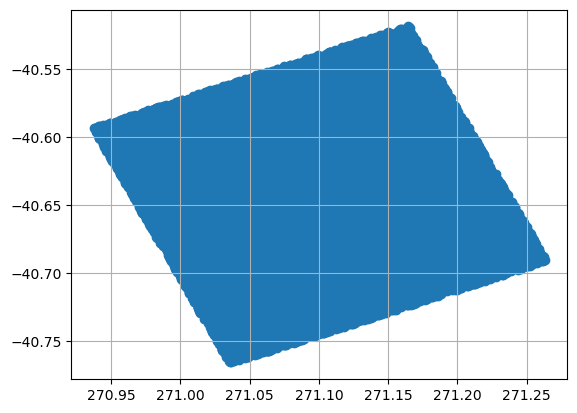

In [13]:

plt.grid()
plt.scatter(cat['ra'],cat['dec'])

In [22]:
def progressbar(i,n,start_time=None):
    process = '%s/%s'%(i,n)                                                          
    bar = '[' + round(i/n*100) * '>' + (100-round(i/n*100)) * '-' + ']'
    if start_time:
        import time
        dur = time.time() - start_time
        dur = '%02d h, %02d min, %02d s' % (dur//3600, (dur%3600)//60, dur%60)
        print('\r进度: ' + process.ljust(0) + bar.ljust(20) + dur , flush=True,end='')
    else:
        print('\r进度: ' + process.ljust(0) + bar.ljust(20) , flush=True,end='')

if __name__ == '__main__':
    import time
    start = time.time()
    for i in range(111):
        progressbar(i,111,start)
        time.sleep(0.1)

进度: 110/111[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>-]00 h, 00 min, 11 s

密集星场的合并检查

In [1]:
from astropy.table import Table
import pandas as pd

cat = pd.DataFrame()
for i in range(15):
    cat_path = '/home/haoyanzhen_shao/project/simulation_work/data_dir/catalog/crowdedField_sampler0318/from_N6397_3e8_%s.fits'%i
    cati = Table.read(cat_path).to_pandas()
    cat = pd.concat((cat,cati))
cat[:10]

,RA,Dec,app_sdss_g,teff,grav,feh,pmra,pmdec,RV,parallax
0,271.691534,-41.279784,24.345357,4616.205773,4.992091,-1.968205,-0.218243,-0.467149,-33.386762,0.034012
1,270.581802,-40.336166,13.161456,4060.260126,5.092311,-2.855982,-0.216098,-0.462113,-127.468319,0.024195
2,271.261614,-41.034712,25.326516,5453.717177,4.825342,-1.536618,-0.199943,-0.469507,-13.271477,0.033400
3,270.951554,-41.423579,26.338386,6346.065780,4.467717,-2.980816,-0.207027,-0.468926,-59.116890,0.026449
4,271.290447,-40.483884,23.328721,6756.608049,3.266765,-0.481689,-0.214381,-0.469032,-8.009576,0.049547
5,270.895491,-40.760389,25.716688,5458.001017,3.376521,-0.716865,-0.208973,-0.463969,-18.087939,0.023093
6,271.410218,-40.376756,24.749361,5507.033315,1.761639,-3.441275,-0.212616,-0.458761,-98.622333,0.034441
7,271.372773,-41.624093,26.309659,3560.936137,3.998757,-1.087775,-0.207508,-0.481926,-8.922062,0.001246
8,271.258288,-41.159703,14.975136,5920.816024,3.525832,-1.162849,-0.226928,-0.460495,-87.920023,0.051177
9,270.405171,-40.667599,16.816429,6218.295555,1.174535,-2.298701,-0.215373,-0.467393,-64.435655,0.012942


In [3]:
cat.describe()

,RA,Dec,app_sdss_g,teff,grav,feh,pmra,pmdec,RV,parallax
count,3.000000e+08,3.000000e+08,3.000000e+08,3.000000e+08,3.000000e+08,3.000000e+08,3.000000e+08,3.000000e+08,3.000000e+08,3.000000e+08
mean,2.710000e+02,-4.100003e+01,2.286074e+01,5.090771e+03,4.109046e+00,-1.669448e+00,-2.174013e-01,-4.648192e-01,-2.069086e+01,3.498206e-02
std,4.041689e-01,4.041563e-01,3.481805e+00,1.175358e+03,1.048139e+00,8.026469e-01,1.114078e-02,1.192430e-02,5.041630e+01,3.499430e-02
min,2.703000e+02,-4.170000e+01,6.370756e+00,2.335004e+03,1.064502e+00,-3.506999e+00,-2.879418e-01,-5.312214e-01,-2.788911e+02,7.469936e-08
25%,2.706499e+02,-4.135006e+01,2.115307e+01,4.378615e+03,3.430668e+00,-2.230130e+00,-2.249155e-01,-4.728619e-01,-5.470235e+01,1.005527e-02
50%,2.710000e+02,-4.100006e+01,2.386079e+01,5.070378e+03,4.613209e+00,-1.652256e+00,-2.174015e-01,-4.648196e-01,-2.068583e+01,2.422117e-02
75%,2.713500e+02,-4.065004e+01,2.549498e+01,5.867482e+03,4.877820e+00,-1.063630e+00,-2.098864e-01,-4.567773e-01,1.329775e+01,4.850561e-02
max,2.717000e+02,-4.030000e+01,2.696250e+01,7.694998e+03,5.227500e+00,-9.900001e-02,-1.526308e-01,-3.954232e-01,4.372921e+02,6.656018e-01


array([[<AxesSubplot: title={'center': 'RA'}>,
        <AxesSubplot: title={'center': 'Dec'}>,
        <AxesSubplot: title={'center': 'app_sdss_g'}>],
       [<AxesSubplot: title={'center': 'teff'}>,
        <AxesSubplot: title={'center': 'grav'}>,
        <AxesSubplot: title={'center': 'feh'}>],
       [<AxesSubplot: title={'center': 'pmra'}>,
        <AxesSubplot: title={'center': 'pmdec'}>,
        <AxesSubplot: title={'center': 'RV'}>],
       [<AxesSubplot: title={'center': 'parallax'}>, <AxesSubplot: >,
        <AxesSubplot: >]], dtype=object)

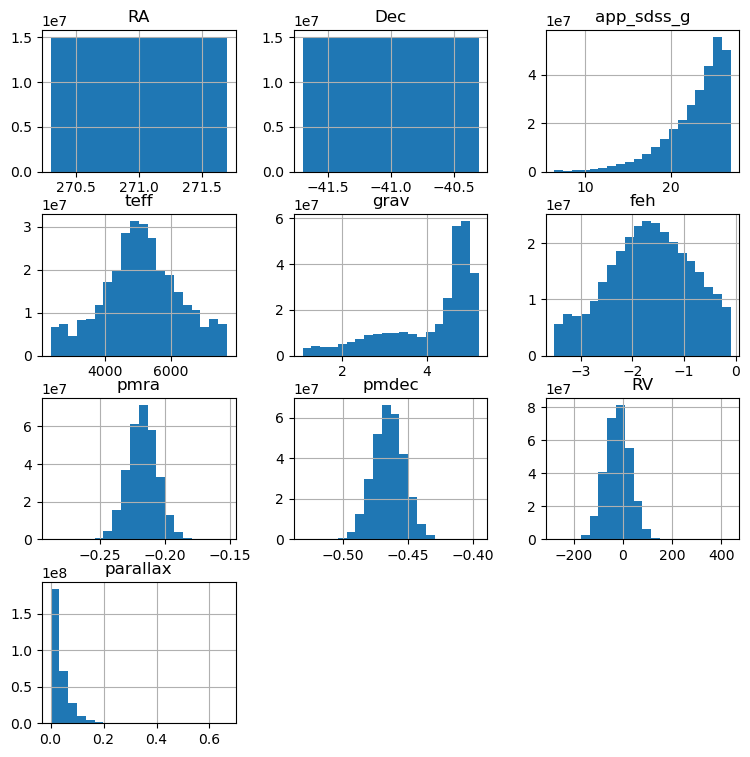

In [17]:
cat.hist(bins=20,figsize=(9,9))